In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

In [2]:
# Complete 263, 300, 325
upjongNumber = "263"
xAxisTitle = "averageSalesGrowthRate"
yAxisTitle = 'averageOperatingProfitsGrowthRate'
clusterTitle = 'growthRatesPoints'
theNumberOfClusters = 4

df = pd.DataFrame(columns=[xAxisTitle , yAxisTitle])

In [3]:
companyNames = []
companyCodes = []

with open(f"./growthRates{upjongNumber}.csv", 'r', encoding='UTF-8') as csvfile:
    reader = csv.reader(csvfile)
    index = 0;
    for row in reader:
        if index > 0:
            df.loc[index-1] = [float(row[2]), float(row[3])]
            companyNames.append(row[0])
            companyCodes.append(row[1])
        index += 1

In [4]:
dataPoints = df.values
kmeans = KMeans(n_clusters=theNumberOfClusters).fit(dataPoints)
clusterCenters = kmeans.cluster_centers_
df[clusterTitle] = kmeans.labels_

In [5]:
df

,averageSalesGrowthRate,averageOperatingProfitsGrowthRate,growthRatesPoints
0,0.18,0.91,0
1,0.17,0.94,0
2,0.23,0.96,0
3,0.04,1.00,0
4,0.63,0.89,2
5,0.21,0.95,0
6,0.03,0.63,3
7,0.14,0.94,0
8,0.21,0.95,0
9,0.39,0.82,2


C:\Users\trill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '263 Growth Rates Clustering')

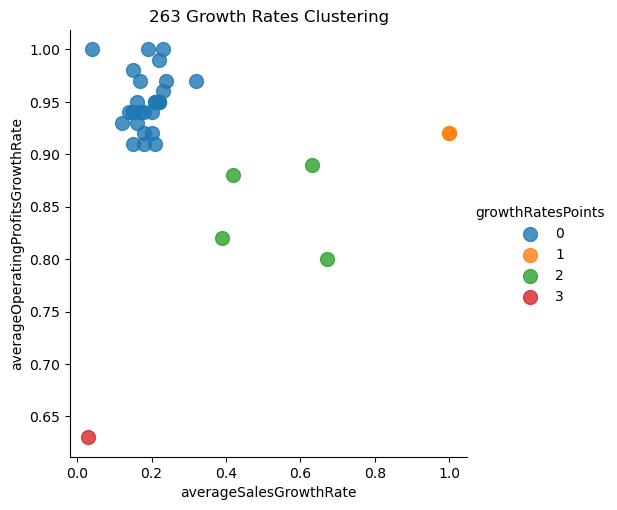

In [6]:
sns.lmplot(xAxisTitle, yAxisTitle, data=df, fit_reg=False, scatter_kws={"s": 100}, hue=clusterTitle)
plt.title(f"{upjongNumber} Growth Rates Clustering")

In [7]:
import os

if not os.path.exists("./results"):
    os.makedirs("./results")
    

with open(f"./results/growthRates{upjongNumber}.csv", 'w', newline='', encoding='UTF-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["companyName", "companyCode", xAxisTitle, yAxisTitle, clusterTitle])
    for index in df.index:
        averageSalesGrowthRate = df[xAxisTitle][index]
        averageOperatingProfitsGrowthRate = df[yAxisTitle][index]
        growthRatesPoints = df[clusterTitle][index]
        data = [companyNames[index], companyCodes[index], averageSalesGrowthRate, averageOperatingProfitsGrowthRate, growthRatesPoints]
        writer.writerow(data)

print(f"[+] Success To Download Clustering Growth Rates {upjongNumber} CSV File")

[+] Success To Download Clustering Growth Rates 263 CSV File
